In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Customer Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing The Blanks with 0 as tenure is 0 and no Total charges were Recorded

In [47]:
#so now we need to check all columns and its types and what it contain is theri null value or blank and alll sooo...
data["TotalCharges"]=data["TotalCharges"].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype(float)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [55]:
data.duplicated().sum()

0

In [57]:
#the upper one is checking for the whole row but we want is that we doesn't want to the entry of same person again
data["customerID"].duplicated().sum()

0

In [59]:
#as we can see that the senior citizen column has value(0,1) that is int that is bit confusing so 
def senior(x):
    if x==0:
        return "NO"
    else:
        return "YES"

data["SeniorCitizen"]=data["SeniorCitizen"].apply(senior)


In [61]:
data["SeniorCitizen"].unique()

array(['NO', 'YES'], dtype=object)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


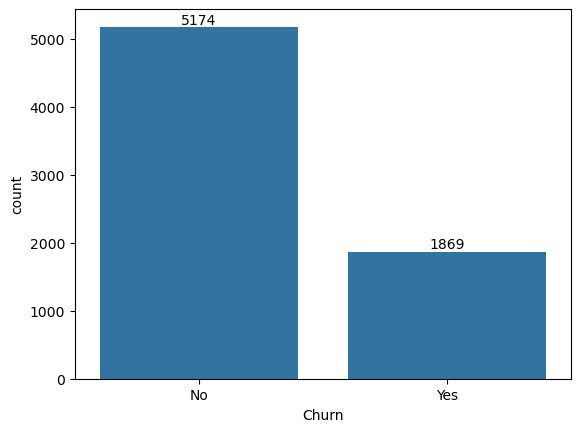

In [71]:
#now comw tp analysis part that why customers stop using their services
#so first see how man customer churned out
ax=sns.countplot(x="Churn",data=data)
ax.bar_label(ax.containers[0])
plt.show()

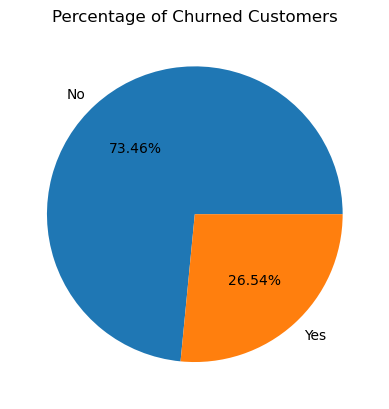

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

In [107]:
#if you want to see percentage
vc=data["Churn"].value_counts()
plt.pie(vc, labels=vc.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=12)
plt.show()
gb=data.groupby("Churn")["Churn"].count()
gb

from the given pie chart we can conclude that 26.54% of customers are churned out
now lets explore the reason behind it

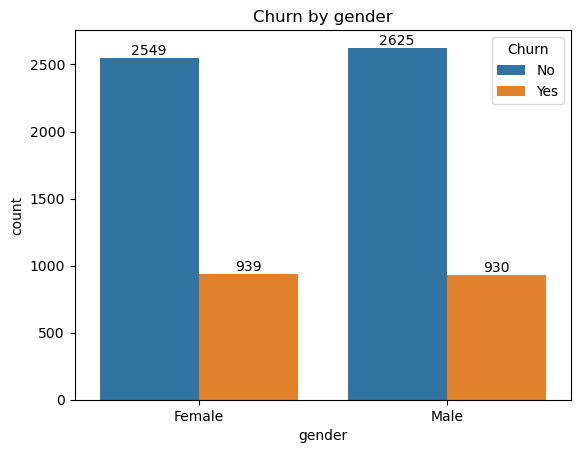

In [132]:
ax=sns.countplot(x="gender",data=data,hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn by gender")
plt.show()

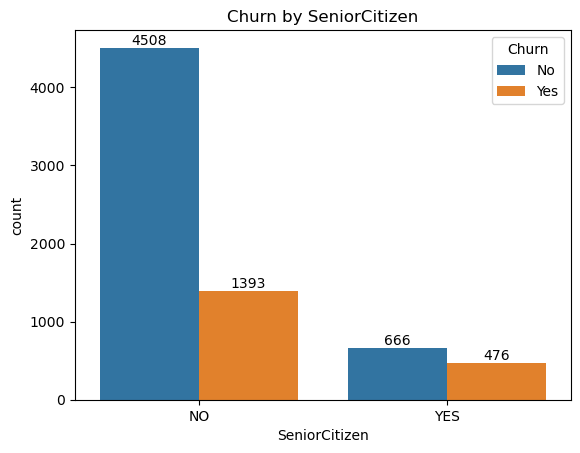

In [134]:
ax=sns.countplot(x="SeniorCitizen",data=data,hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn by SeniorCitizen")
plt.show()

we can see that more percentage of seniorcitigen churned out

In [210]:
#want to find that how much percent of senior citizen category churned out
gb=data.groupby(["SeniorCitizen","Churn"])["Churn"].count()
print(gb)

total_senior_citizens = gb.loc["YES"].sum()
senior_citizens_churned = gb.loc["YES", 'Yes']

total_adults = gb.loc["NO"].sum()
adult_churned = gb.loc["NO", 'Yes']

senior_citizens_churn_percentage = (senior_citizens_churned / total_senior_citizens) * 100
adult_churn_percentage=(adult_churned/total_adults)*100
print(adult_churn_percentage,senior_citizens_churn_percentage)



SeniorCitizen  Churn
NO             No       4508
               Yes      1393
YES            No        666
               Yes       476
Name: Churn, dtype: int64
23.606168446026096 41.68126094570928


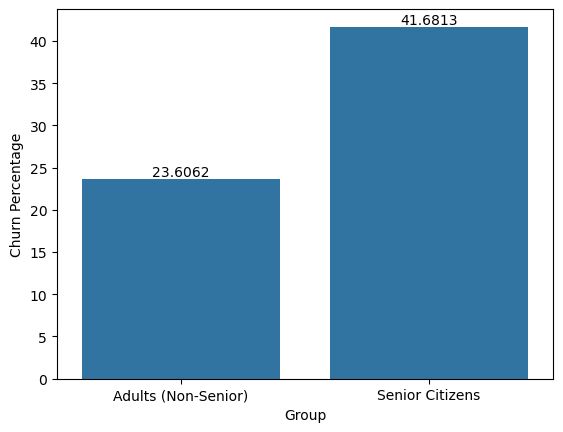

In [183]:
#we csn visualise that also
churn_data = pd.DataFrame({
    "Group": ["Adults (Non-Senior)", "Senior Citizens"],
    "Churn Percentage": [adult_churn_percentage, senior_citizens_churn_percentage]
})
ax=sns.barplot(x="Group",y="Churn Percentage",data=churn_data)
ax.bar_label(ax.containers[0])
plt.show()

that show the percentage of the person churned out acc to category of senior citizen
comparitively a greater percentage of people in senior citizen category had churned out

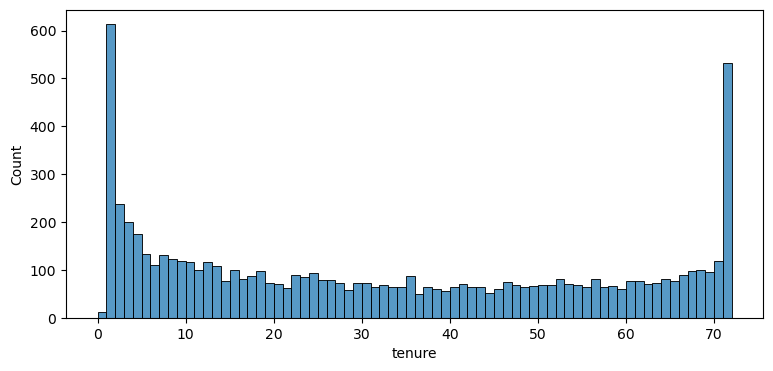

In [217]:
#now lets analyse on the basis of tenure
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=data,bins=72) #dividing into 72 parts as max is 72 and min is 0
plt.show()

that shows that people are with us from that many months we dont know that they are still with us or not 
we can see that most of the people are in 1 month or 72 months

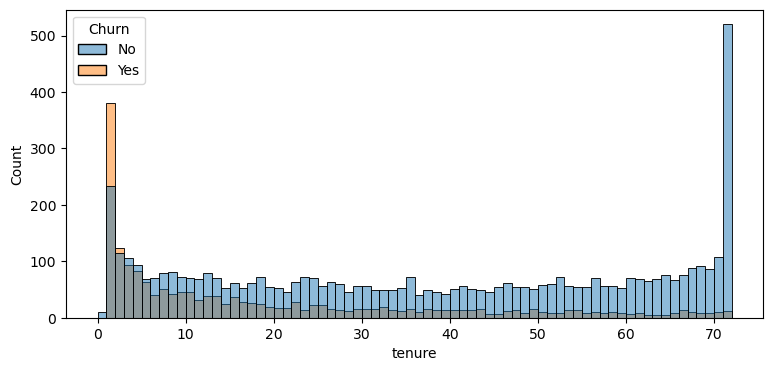

In [223]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=data,bins=72,hue="Churn") #dividing into 72 parts as max is 72 and min is 0
plt.show()

that shows that people are using our services from that many month and they are currently using or not
and people who had used our services for long have stayed and people who have used our servics for 1 or 2 moths are churned mostly
that means most of the people churned in 1 or 2 months

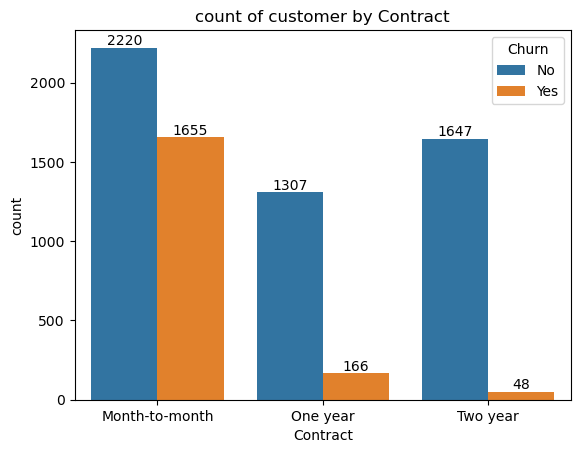

In [232]:
#this may also depend on contract so lets analyse this
ax=sns.countplot(x="Contract",data=data,hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("count of customer by Contract")
plt.show()

we can see that usually the person that are in mont month contract has more chances to churned out so what we can do is we can
confess them to take contract of one or two year

In [235]:
#now analyse the services like movies and all 
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

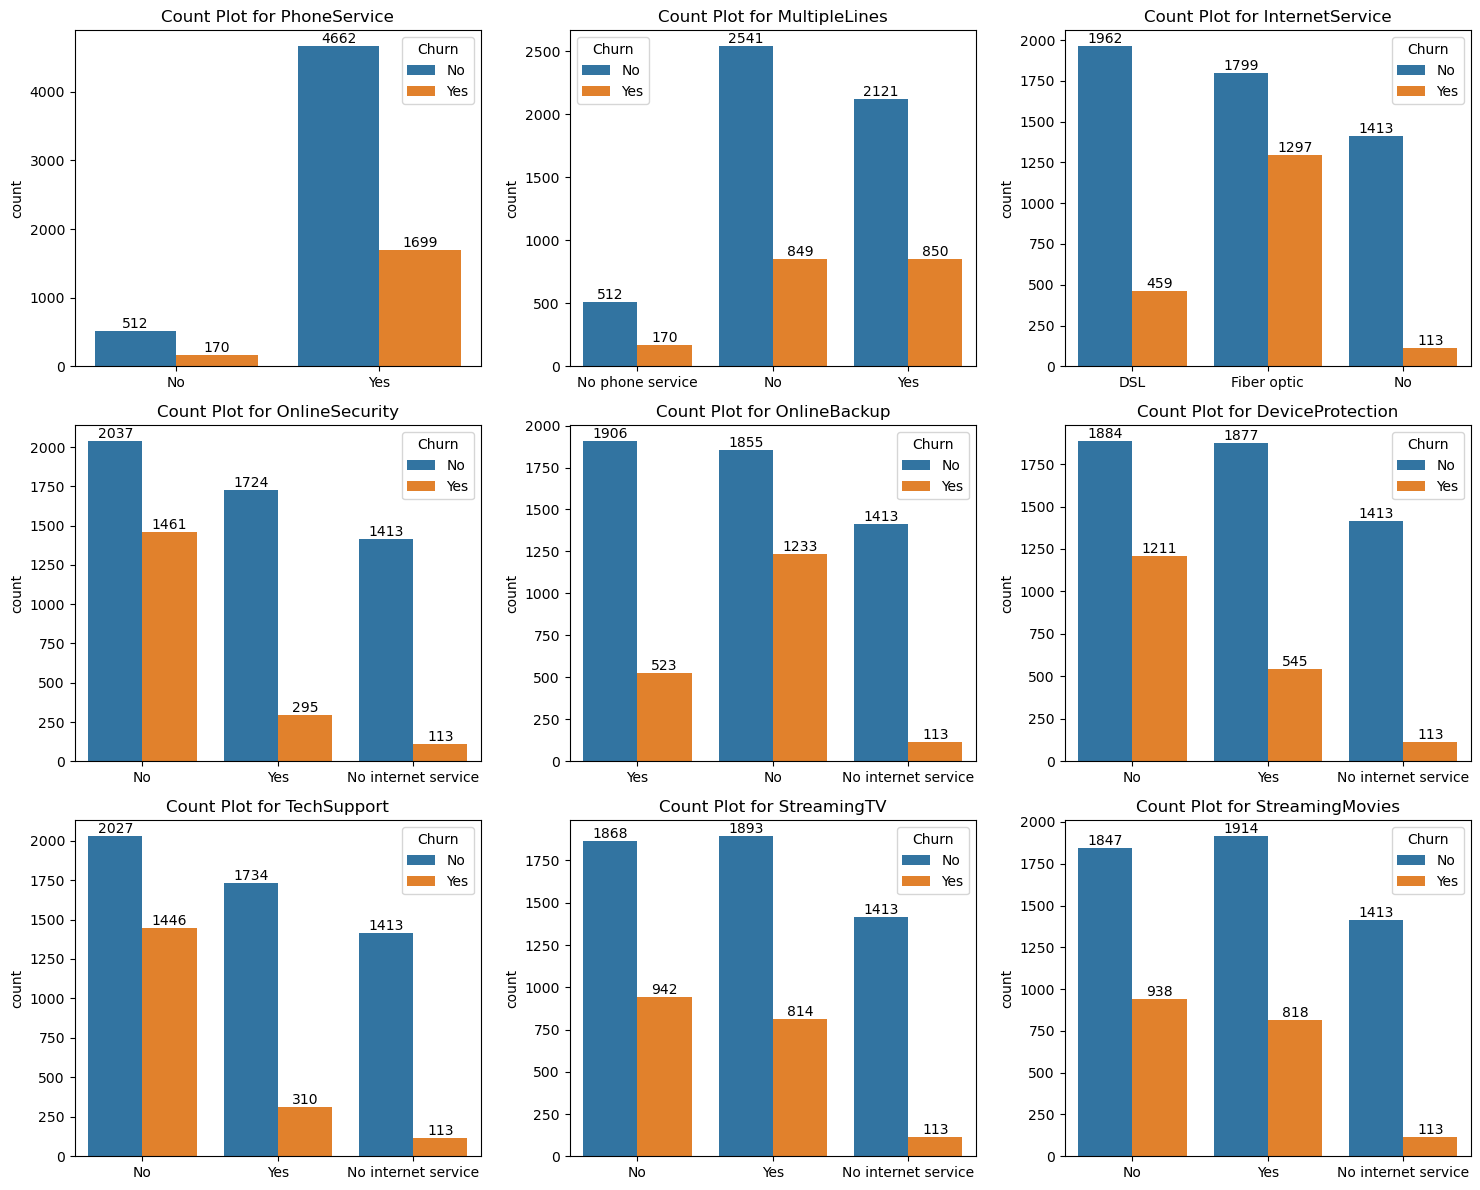

In [244]:
#we can see that their are so many type of services like phoneservice,multilines,internet,security....
#so what we can do is we can plot the subplot for that
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    sns.countplot(data=data, x=col, ax=ax,hue="Churn")
    ax.set_title(f"Count Plot for {col}")
    ax.set_xlabel('')
    
    # Annotate bar values
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Customers with phone services exhibit a higher churn rate compared to those without. Similarly, fiber optic internet users seem to churn more frequently than DSL users. The absence of essential services like online security, backup, and tech support correlates with a notable increase in customer churn, highlighting their significance in customer retention. Interestingly, streaming TV and movie services show minimal impact on churn rates, indicating they may not be decisive factors in customer loyalty. Overall, improving service quality and offering key add-ons could help reduce churn effectively.

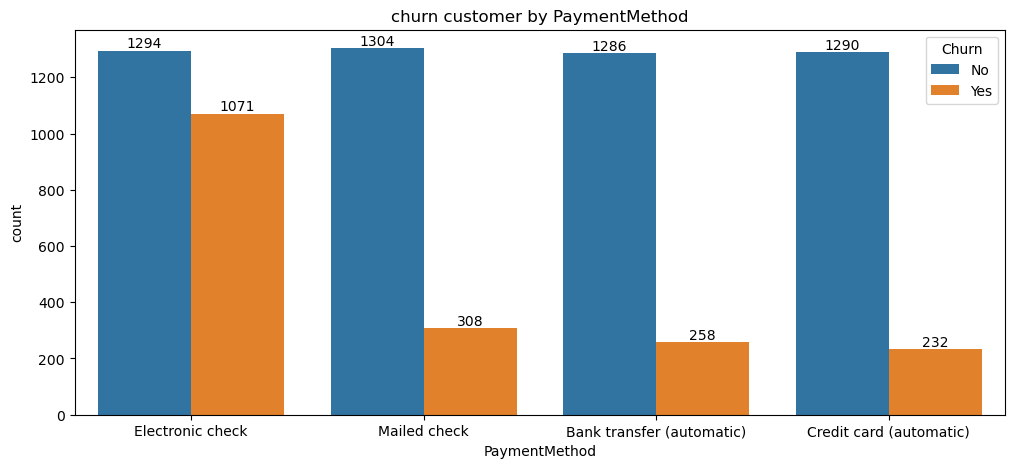

In [251]:
#this may also depend on contract so lets analyse this
plt.figure(figsize=(12,5))
ax=sns.countplot(x="PaymentMethod",data=data,hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("churn customer by PaymentMethod")
plt.show()

customer is likely to churn when he or she is using electonic check as a payment method

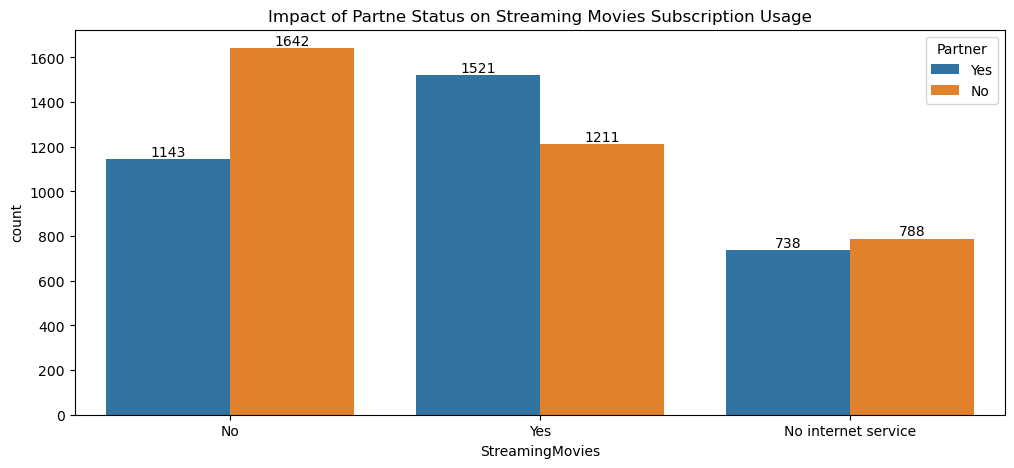

In [259]:
#this may also depend on contract so lets analyse this
plt.figure(figsize=(12,5))
ax=sns.countplot(x="StreamingMovies",data=data,hue="Partner")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Impact of Partne Status on Streaming Movies Subscription Usage")
plt.show()

it appears that customers with a partner are more likely to subscribe to the movie streaming service.

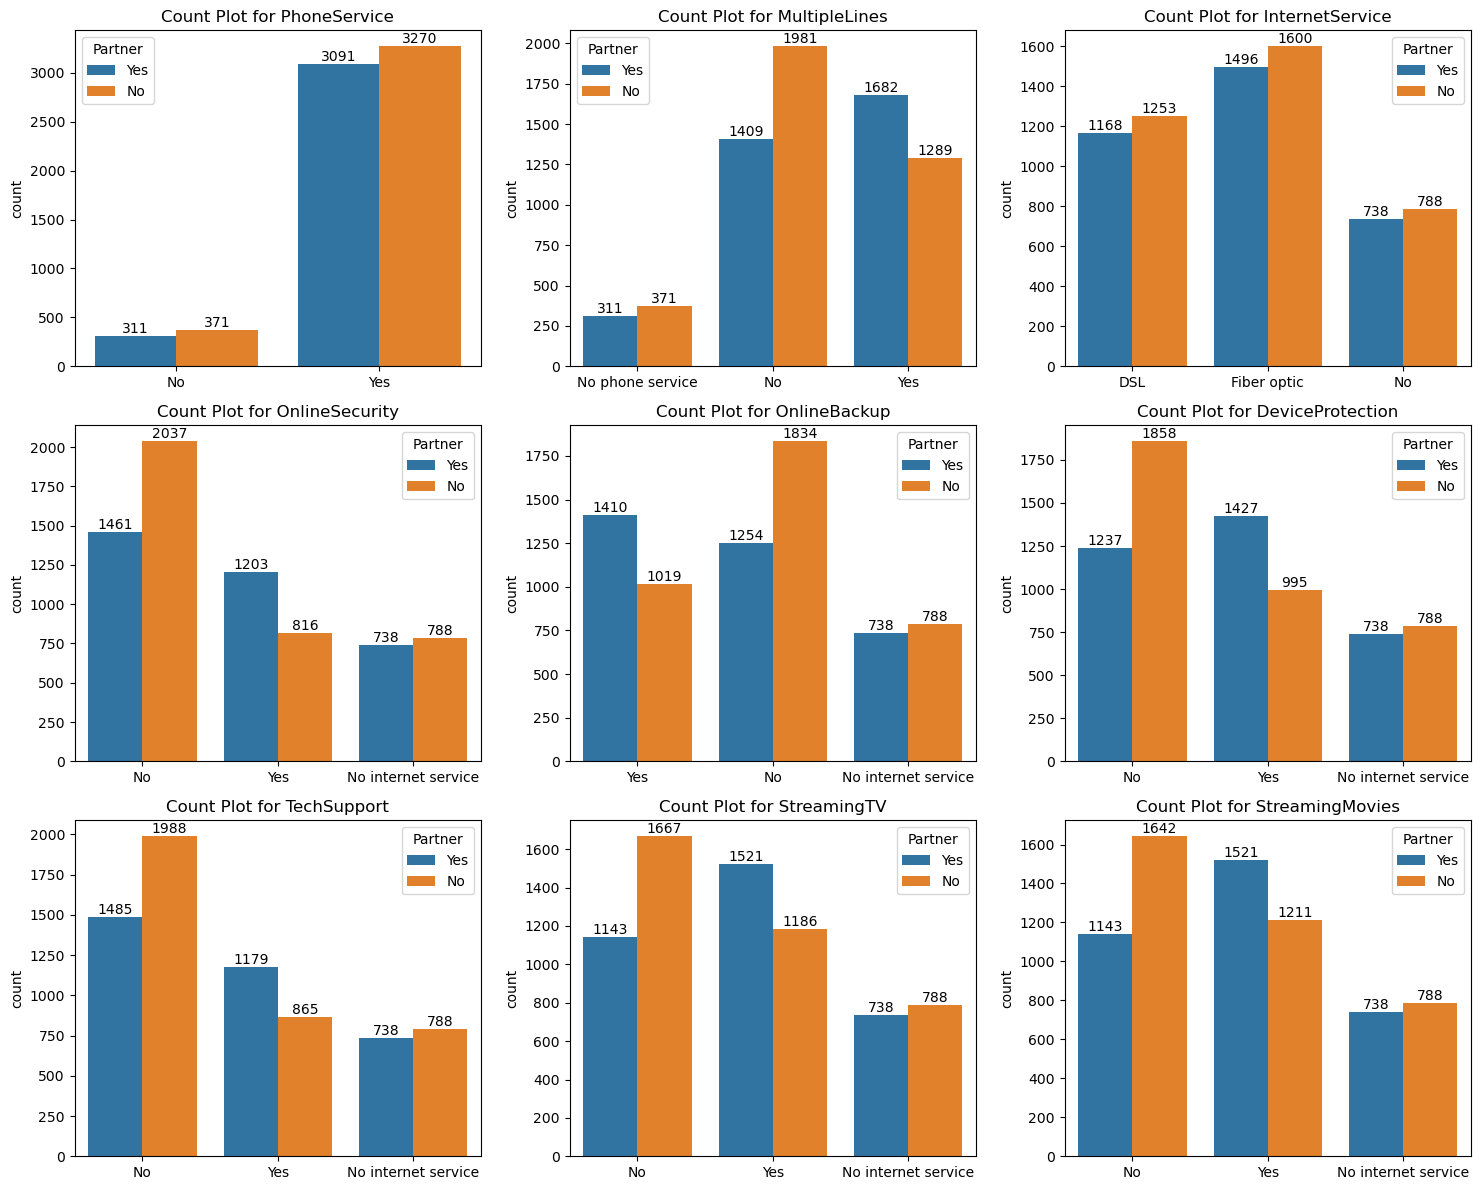

In [264]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    sns.countplot(data=data, x=col, ax=ax,hue="Partner")
    ax.set_title(f"Count Plot for {col}")
    ax.set_xlabel('')
    
    # Annotate bar values
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Partnered customers tend to have higher engagement with services such as phone lines, multiple lines, and streaming services. They also show a greater inclination towards opting for device protection and tech support. In contrast, non-partnered customers are more likely to decline these services, particularly security, online backup, and entertainment options. Despite these variations, internet service subscriptions exhibit a relatively balanced distribution between the two groups. This suggests that partnerships may play a role in influencing the adoption of additional telecom services, particularly those related to shared usage and technical support.

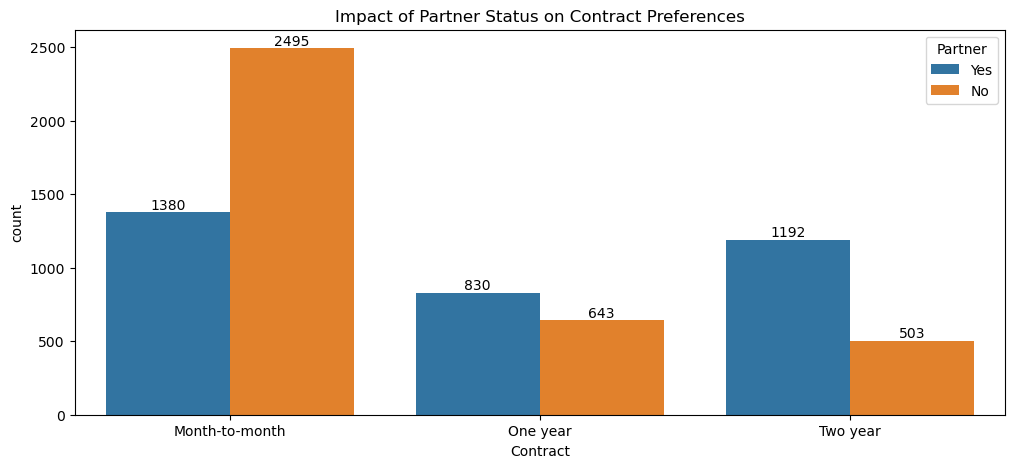

In [274]:
#this may also depend on contract so lets analyse this
plt.figure(figsize=(12,5))
ax=sns.countplot(x="Contract",data=data,hue="Partner")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Impact of Partner Status on Contract Preferences")
plt.show()

Customers without partners prefer month-to-month contracts significantly more than long-term contracts, while customers with partners show a stronger inclination toward one-year and two-year contracts.

In [289]:
data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_3284\2683480517.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_services, y=sorted_charges, palette=colors[:len(sorted_services)])


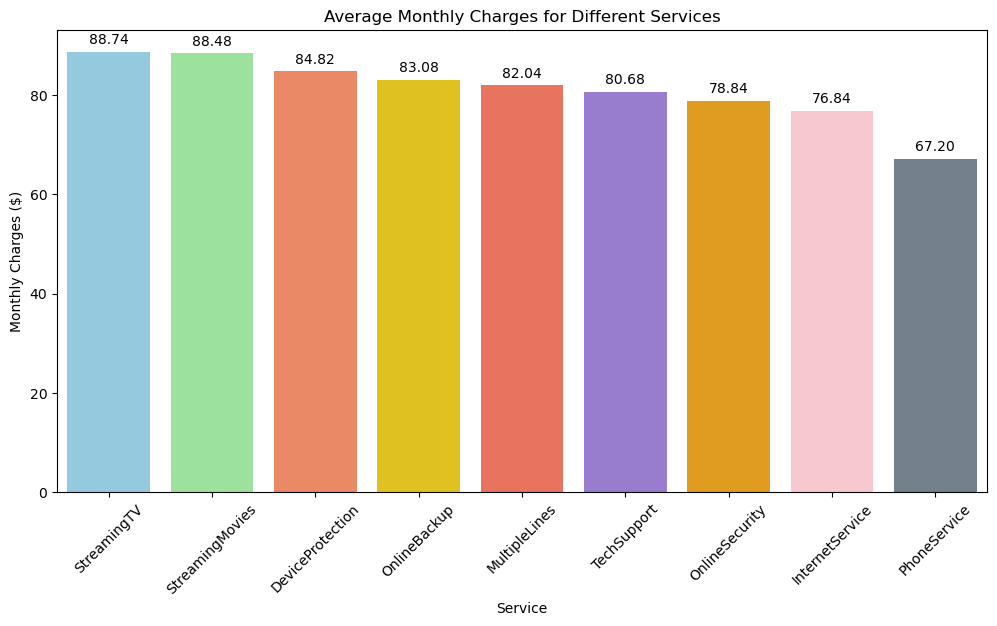

In [291]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies']

# Calculate the average monthly charges for each service
avg_monthly_charges = [data[data[service] == 'Yes']['MonthlyCharges'].mean() for service in services]
a = data[(data["InternetService"] == 'DSL') | (data["InternetService"] == 'Fiber optic')]['MonthlyCharges'].mean()

services.append('InternetService')
avg_monthly_charges.append(a)

colors = ['#87CEEB', '#90EE90', '#FF7F50', '#FFD700','#FF6347', '#9370DB', '#FFA500', '#FFC0CB', '#708090']
# Plotting
sorted_data = sorted(zip(services, avg_monthly_charges), key=lambda x: x[1], reverse=True)
sorted_services, sorted_charges = zip(*sorted_data)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_services, y=sorted_charges, palette=colors[:len(sorted_services)])
plt.xticks(rotation=45)
plt.title('Average Monthly Charges for Different Services')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Service')

# Annotate values on top of bars
for index, value in enumerate(sorted_charges):
    ax.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

The bar plot shows the average monthly charges for different services. StreamingTV and StreamingMovies have the highest average charges at approximately $88.74 and $88.48, respectively. PhoneService has the lowest charge at around $67.20.